<a href="https://colab.research.google.com/github/Luis-David-124/MetodosComputacionales810/blob/main/Students/Betancur_9784/Parciales/Parcial_3_MC_810_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre:

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



In [131]:
# Aquí va su código
# a)
def jacobi(A, b, max_iter = 100, tol = 1e-5):

  n = len(b)

  v_inicial = np.zeros_like(b, dtype= float)
  v_actual = np.zeros_like(b, dtype= float)

  for k in range(max_iter):
    for i in range(n):
      sum = 0
      for j in range(n):
        if j != i:
          sum += A[i, j] * v_inicial[j]

      v_actual[i] = 1/A[i,i] * (b[i] - sum)

    if abs(la.norm(v_actual - v_inicial)) < tol:
      return v_actual, k
    else:
      v_inicial = v_actual.copy()


In [128]:
#b)
A = np.array([
    [10, -2, 2, 0],
    [-2, 11, 0, -4],
    [3, -1, 10, -1],
    [0, 2, -3, 8]
], dtype= float)

b = np.array([6, 25, -11, 15], dtype= float)

sol, iteraciones = jacobi(A, b)

print(f'La solucion al sistema de ecuaciones es: {sol}\n',
      f'Se logro en {iteraciones} iteraciones')

La solucion al sistema de ecuaciones es: [ 1.39177251  2.79478497 -1.16407606  0.73977517]
 Se logro en 10 iteraciones


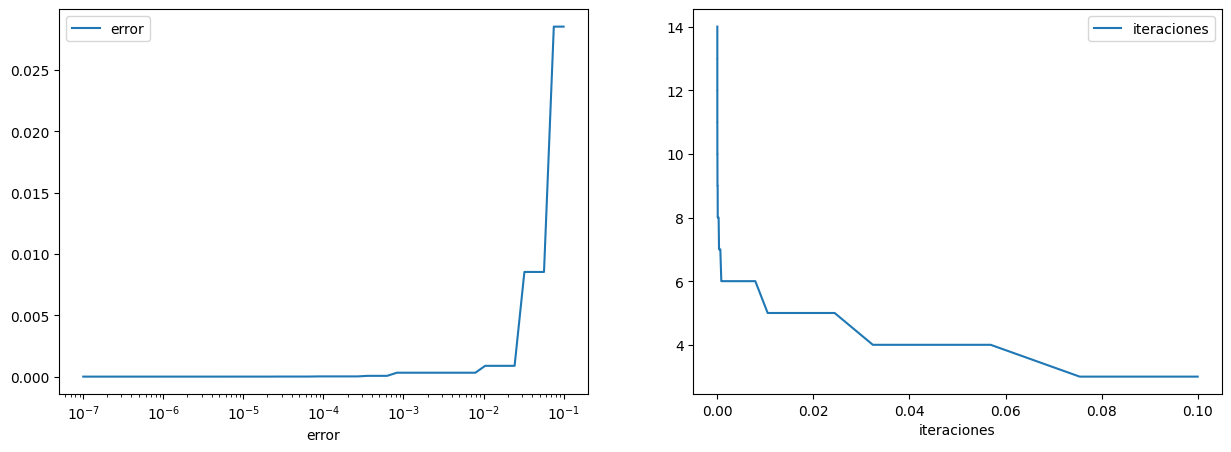

In [147]:
#c)

tol_values = np.logspace(-7, -1)
err_sol = np.zeros_like(tol_values)
iter_sol = np.zeros_like(tol_values)

for i, h in enumerate(tol_values):

  sol_i, it_i = jacobi(A, b, tol= h)
  sol_real = la.solve(A, b)

  err_sol[i] = abs(la.norm(sol_real - sol_i))
  iter_sol[i] = it_i

fig, ax = plt.subplots(1, 2, figsize= (15,5))
ax[0].semilogx(tol_values, err_sol, label= 'error')

ax[0].set_xlabel('error')
ax[0].legend()

ax[1].plot(tol_values, iter_sol, label= 'iteraciones')

ax[1].set_xlabel('iteraciones')
ax[1].legend()


# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


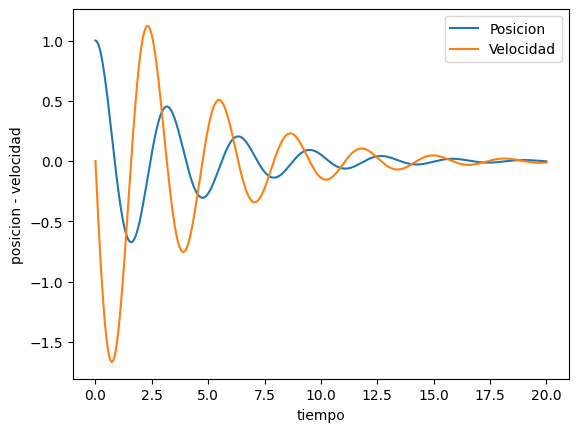

In [37]:
# Aquí va su código

m = 1 #kg
k = 4 #N/m
c = 0.5 #N*s/m

#a)
def f(t, Y): # sistema de ecuaciones lineales para la ecuacion diferencial
  y1, y2 = Y

  dy1 = y2
  dy2 = -(c*y2 + k*y1)/m

  return np.array([dy1, dy2])

#b)
# condiciones iniciales
t0, tf = 0, 20
Y0 = np.array([1, 0])
# lapsos de tiempo
h = 0.001
t = np.arange(t0, tf, h)

#solucion
sol = solve_ivp(f, (t0, tf), Y0, t_eval= t)

'''------------------------------------------ Graficas ------------------------------------------'''
plt.plot(sol.t, sol.y[0], label= 'Posicion')
plt.plot(sol.t, sol.y[1], label= 'Velocidad')

plt.xlabel('tiempo')
plt.ylabel('posicion - velocidad')

plt.legend()

[array([2.00000000e+00, 2.00000000e+00, 1.99999998e+00, ...,
        8.34810801e-05, 8.34051915e-05, 8.33294748e-05]),
 array([2.        , 2.        , 2.        , ..., 1.9982219 , 1.9982217 ,
        1.99822157]),
 array([2.00000000e+00, 1.99999998e+00, 1.99999981e+00, ...,
        1.73207824e-13, 1.72148563e-13, 1.71066792e-13])]

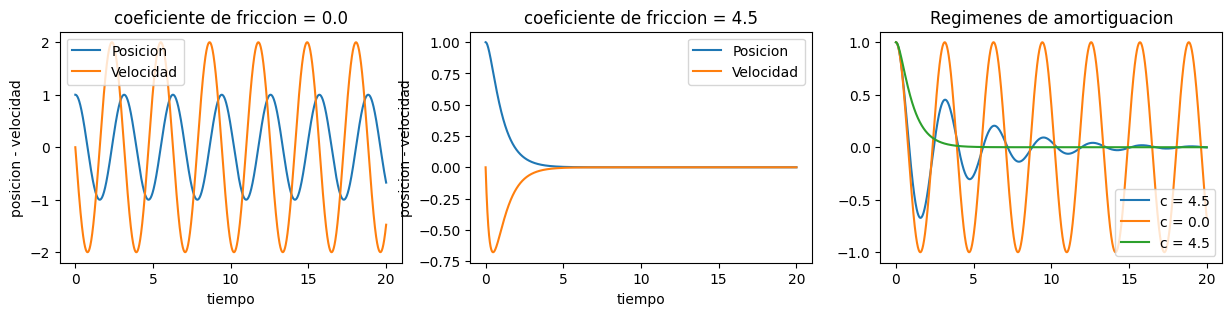

In [51]:
#c)
c_values = np.array([0., 4.5])

E_mecanica = [] # Array para almacenar las energias mecanicas del punto d
E_cinetica = m*sol.y[1]**2 /2
E_pot = k*sol.y[0]**2 /2

E_mecanica.append(E_cinetica + E_pot)

'''------------------------------------------ Graficas ------------------------------------------'''
fig, ax = plt.subplots(1, 3, figsize= (15, 3))

ax[2].plot(sol.t, sol.y[0], label= f'c = {c}')
ax[2].set_title('Regimenes de amortiguacion')

for i, c in enumerate(c_values):
  #solucion
  sol_values = solve_ivp(f, (t0, tf), Y0, t_eval= t)

  ax[2].plot(sol_values.t, sol_values.y[0], label= f'c = {c}')
  ax[2].legend()

  ax[i].set_title(f'coeficiente de friccion = {c}')

  ax[i].plot(sol_values.t, sol_values.y[0], label= 'Posicion')
  ax[i].plot(sol_values.t, sol_values.y[1], label= 'Velocidad')

  ax[i].set_xlabel('tiempo')
  ax[i].set_ylabel('posicion - velocidad')
  ax[i].legend()

  #d)

  E_cinetica = m*sol_values.y[1]**2 /2
  E_pot = k*sol_values.y[0]**2 /2

  E_mecanica.append(E_cinetica + E_pot)


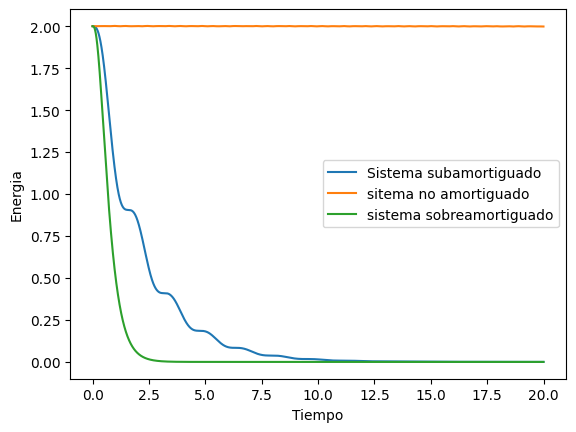

In [56]:
#d)
plt.plot(t, E_mecanica[0], label= 'Sistema subamortiguado')
plt.plot(t, E_mecanica[1], label= 'sitema no amortiguado')
plt.plot(t, E_mecanica[2], label= 'sistema sobreamortiguado')

plt.xlabel('Tiempo')
plt.ylabel('Energia')
plt.legend()

se puede ver que el sistema donde c=0 la energia mecanica se conserva, mientras que a medida que c aumenta el sistema precenta perdida o discipacion de energia

# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [104]:
from ast import Mult
# Aquí va su código

Matrices = []

for M in range(1000):
  Matrices.append(np.random.uniform(-10, 10, (5,5)))

def det_aigvals(A):
  ''' calcula el determinante de una matriz A mediante la multiplicacion de sus eigen valores

  Entradas:
  -A: Matriz

  Salidas
  -det: determinante'''

  n = np.shape(A)[0]
  vals = la.eigvals(A)
  det = np.prod(vals)

  return det

def trace_aigvals(A):
  ''' calcula la traza de una matriz A mediante la suma de sus eigen valores

  Entradas:
  -A: Matriz

  Salidas
  -det: determinante'''

  vals = la.eigvals(A)
  det = sum(vals)

  return det

isReal = True
cumplio = 0

for A in Matrices:
  traza_real = la.trace(A)
  det_real = la.det(A)

  traza_valores = trace_aigvals(A)
  det_valores = det_aigvals(A)

  if not np.isclose(traza_real, traza_valores) or not np.isclose(det_real, det_valores):
    print(f'La propiedad no se cumple para la matriz {A} donde la traza y el determinante real vs los de la propiedad son:\n\n',
          f'traza real = {traza_real}, traza de la propiedad = {traza_valores}\n',
          f'determinante real = {det_real}, determinante de la propiedad = {det_valores}\n')

    isReal = False

    break
  else:
    cumplio += 1

if isReal:
  print(f'Se cumplio {cumplio} veces')

Se cumplio 1000 veces
